In [20]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [21]:
config = pd.read_csv("config.csv")

In [22]:
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [23]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [24]:
twitterAccount = input("Twitter username: ")

Twitter username: elonmusk


In [25]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [26]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [27]:
df.head()

,Tweet
0,New SpaceX Starlink cover shows transfer orbit...
1,https://t.co/oGKHhHROQa
2,"Congrats Tesla Team on over 200,000 car built ..."
3,https://t.co/g9F1p0bpr8
4,Super Heavy on road &amp; 7th Tower segment ad...


In [28]:

def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [29]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [30]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [31]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [32]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,New SpaceX Starlink cover shows transfer orbit...,0.454545,0.136364
1,,0.000000,0.000000
2,"Congrats Tesla Team on over 200,000 car built ...",0.500000,0.781250
3,,0.000000,0.000000
4,Super Heavy on road &amp; 7th Tower segment ad...,0.583333,0.066667
5,Super Heavy moves tomorrow,0.583333,0.066667
6,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge...",0.000000,0.000000


In [33]:
df = df.drop(df[df['Tweet'] == ''].index)

In [34]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,New SpaceX Starlink cover shows transfer orbit...,0.454545,0.136364
2,"Congrats Tesla Team on over 200,000 car built ...",0.500000,0.781250
4,Super Heavy on road &amp; 7th Tower segment ad...,0.583333,0.066667
5,Super Heavy moves tomorrow,0.583333,0.066667
6,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge...",0.000000,0.000000


In [35]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [36]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [37]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,New SpaceX Starlink cover shows transfer orbit...,0.454545,0.136364,Positive
2,"Congrats Tesla Team on over 200,000 car built ...",0.500000,0.781250,Positive
4,Super Heavy on road &amp; 7th Tower segment ad...,0.583333,0.066667,Positive
5,Super Heavy moves tomorrow,0.583333,0.066667,Positive
6,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge...",0.000000,0.000000,Neutral


In [38]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

80.0 % of positive tweets


<BarContainer object of 2 artists>

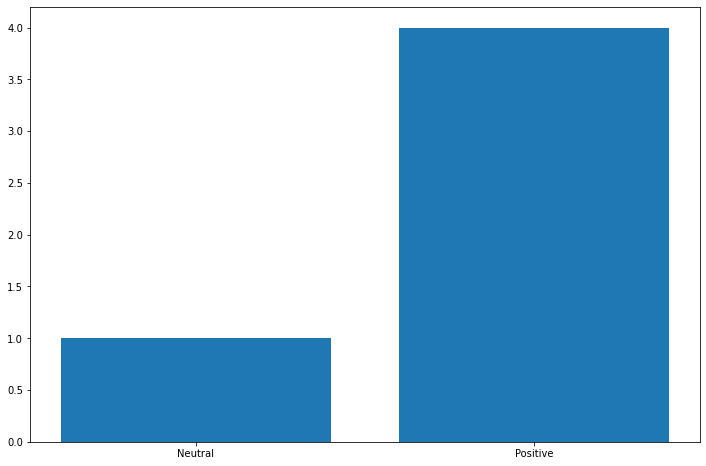

In [39]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

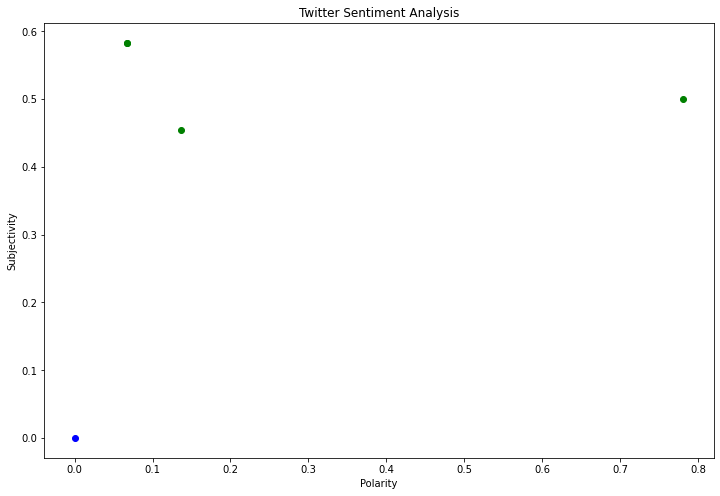

In [40]:

for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [41]:

objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

20.0 % of objective tweets


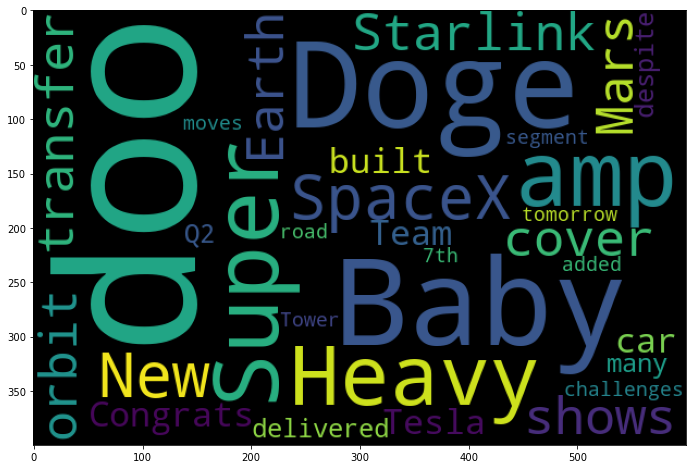

In [42]:

words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()